# New York Airbnb Open Data
## This dataset contains real data from houses which has been shared by owners in New York Airbnb. The main object of this project are as following:
###1- Cleaning data and handling missing values and outliers
###2- Analysing despceriptive statisitics with visualization
###3- Analysing owners
###4- Finding host with most costumers and reasons for that
###5- Defining 5 statistical hypothesises and investigating them.
###6- Prediciting the rental price by provided feature vectors

* **Bonus Task**:
#### 1- Adding data to the main data set to investigate the effect of them on price, costumer satisfaction, and etc,.
#### 2- Investigating if sexulaity of the owner has effect on the price, costumer satisfaction, and etc.



In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# Uploading the dataset from local storage
from google.colab import files
uploaded = files.upload()


Saving AB_NYC_2019.csv to AB_NYC_2019.csv


In [ ]:
import io
raw_data = pd.read_csv(io.BytesIO(uploaded['AB_NYC_2019.csv']))
raw_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
 #Investigating the data set size
 raw_data.shape

(48895, 16)

In [ ]:
 #Investigating data type 
raw_data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

## Task 1: Handling misisng data and outliers


### 1- Handling missing data

In [ ]:
# Calculating number of null values for each fearutre
raw_data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

name and host_name has 16 and 21 missing values, according to our task list we will not use tha name features so we can drop it. However for host_name column we may need to predict the sexulaity of the owner.
To overcome this situation we assing the sexuality randomly to each missing values. (See Bonous task no 1)
It seeams that the missing data for last_review and reviews_per_month feture vectors, happens when there is no commments for the property. To investigat that we analyse this two columns

In [ ]:
# Finding the minimum number of review per month
raw_data["reviews_per_month"].min()

0.01

As we can see our hypothsis was correct and the missing values for these two columns happens when there is no review for the property.
There for we can replace the null vanlues with zeroes in the review per month and assign 2022-01-01 for the last review wich shows that this property may have review in future.


In [ ]:
# Filling the missing values
raw_data["reviews_per_month"]=raw_data["reviews_per_month"].fillna(0)
raw_data["last_review"]=raw_data["last_review"].fillna("2022-01-01")

### 2- Handling outliers
* **Analysing the neigberhood_group and neigberhood**

In [ ]:
raw_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2022-01-01,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# Calculating the percent of houses in each neighberhood_group
raw_data["neighbourhood_group"].value_counts()/len(raw_data)*100

Manhattan        44.301053
Brooklyn         41.116679
Queens           11.588097
Bronx             2.231312
Staten Island     0.762859
Name: neighbourhood_group, dtype: float64

It seems the Stateb Island area has only 0.76 percent of whole data. We can remove thsi part of data. However I prefer to save thsi data to analyse the effect of neighborhood of the price. Therefore, in our logic try find pattern based on on the neigherhood.

In [ ]:
# Calculating the value count in each neighberhood.
raw_data["neighbourhood"].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

The distribution of the neighberhood values showes that there is 221 disitinict neigerhood. However there are some neighberhood wiht low frequency, it is not logical to remove them from the dataset

* **Analysing latitude and lingtitude**

To find outlier based on the location of the houses we will draw as scatter plot

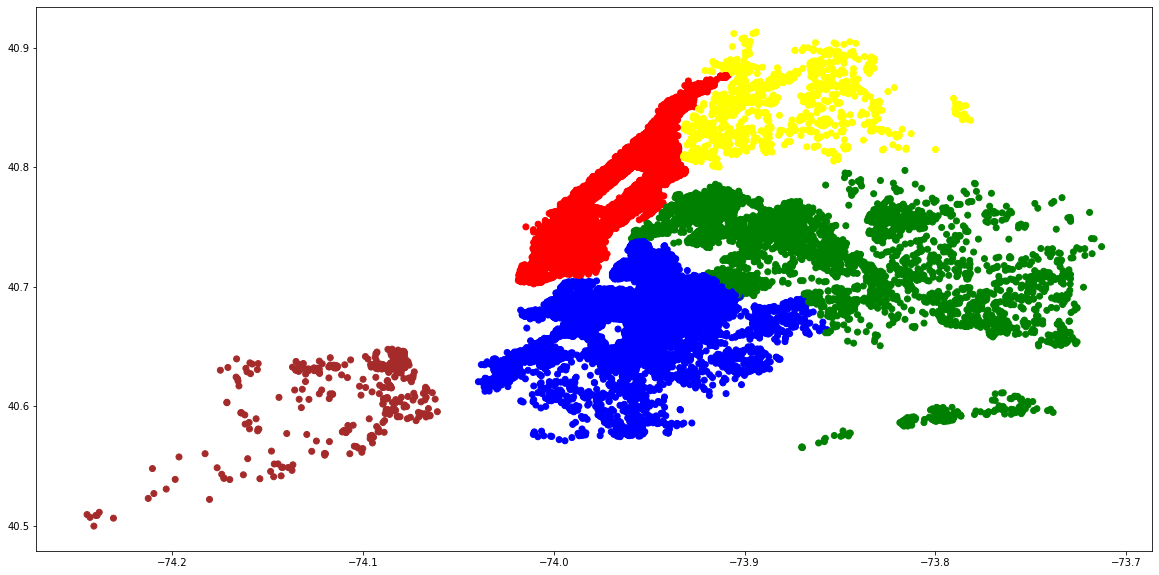

In [ ]:
# Defining color map dictionary for each neigherhood group
color_map={"Manhattan":"red","Brooklyn":"blue","Queens":"green","Bronx":"yellow","Staten Island":"brown"  }
# Drawing scatter plot based of long and lat and neigerhood group
plt.figure(figsize=(20,10))
plt.scatter(raw_data["longitude"], raw_data["latitude"], c=raw_data["neighbourhood_group"].map(color_map));

Based of the above figure we can see that some houses in Staten Island(brown), Queens(green), and Bronx(yellow) neighberhood gruop are somehow departed from other part of the city.
However, I will keep this point to analyse if there is any conection between this points and othe features like price, reviews and etc.

* **Analysing room type**

In [ ]:
# Count values of room type
raw_data["room_type"].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

It is ok,  let look at the next feature

* **Analysing the price**

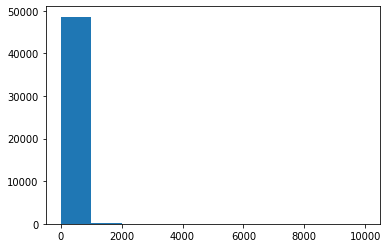

In [ ]:
# First lets look at the distribution of the price
plt.hist(raw_data["price"]);

It seems wiht histogaram we can not get any promnising conclustion. Lets modify our histogram

In [ ]:
# Find max and min price
print(raw_data["price"].max(), raw_data["price"].min())

10000 0


Some property has the price zero which is not logical and some price has the price 10000. Let find how many house has the min and max price


In [ ]:
# Value count the houses with no price
(raw_data["price"]==0).sum()

11

In [ ]:
# Value count the houses with max price
(raw_data["price"]==10000).sum()

3

(array([4.8646e+04, 1.5200e+02, 4.1000e+01, 1.3000e+01, 1.2000e+01,
        4.0000e+00, 5.0000e+00, 4.0000e+00, 1.0000e+00, 3.0000e+00]),
 array([  10. , 1008.9, 2007.8, 3006.7, 4005.6, 5004.5, 6003.4, 7002.3,
        8001.2, 9000.1, 9999. ]),
 <a list of 10 Patch objects>)

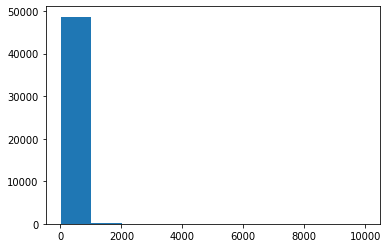

In [ ]:
# Drop houses with max and no price however we store new data in new dataframe, so we can refer to the main data if it is needed
cleaned_data=raw_data[raw_data["price"]!=0]
cleaned_data=cleaned_data[cleaned_data["price"]!=10000]
plt.hist(cleaned_data["price"])

Still we can not have any coclusion about the distribution, let draw a hsitogram based on our own bins.

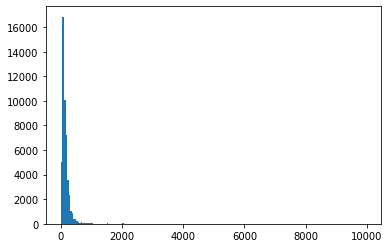

In [ ]:
#Define bin list
bin=np.arange(0,10000, 50);
# Drawing histogram based on our defined bins
plt.hist(cleaned_data["price"], bins=bin);

It seems better but still not good enough. Let see tha graph on a bigger figure

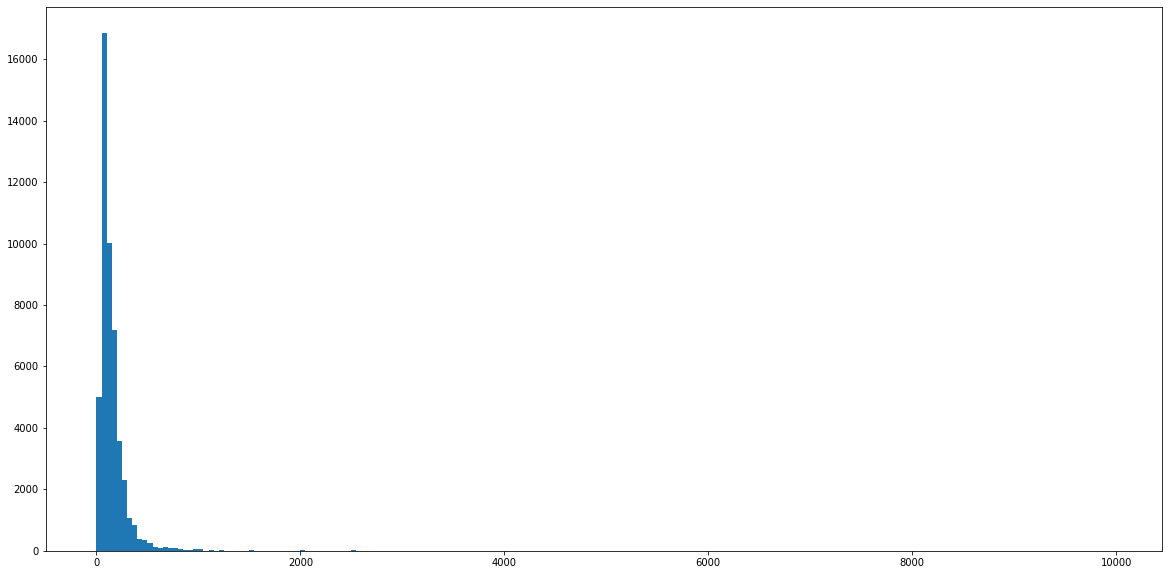

In [ ]:
plt.figure(figsize=(20,10))
plt.hist(cleaned_data["price"], bins=bin);

It can be seen form the figure that the data has the shpae of normal distribution. I thought about removing data outside of 3sigma, howvere I think it would do much good, so I prefer to use the quartile method. However, I will use the upper limit and do not use the lower limit for removing outliers.

In [ ]:
#Calculating IQR
Q1=cleaned_data["price"].quantile(0.25)
Q3=cleaned_data["price"].quantile(0.75)
upper_bound=Q3+1.5*(Q3-Q1)

In [ ]:
# Droping records with price more than upper bound
cleaned_data=cleaned_data[cleaned_data["price"]<upper_bound]

In [ ]:
# Calculating percnet of data we droped so far
((len(raw_data)-len(cleaned_data)))/len(raw_data)*100

6.111054300030678

We removed about 6 percent of data so far. Some of these data were missing data and some of them were outlire. 

* **Minimum nights**

Propertties with more than one year condition may seem unusual case for rentig. The owner may enter number randomly and did not pat attention to this field. So, it is better to have look at houses with more than 365 nights.

In [ ]:
# Finding cases with more than 365 days for minimum nights
cleaned_data[cleaned_data["minimum_nights"]>365]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1305,568684,800sqft apartment with huge terrace,2798644,Alessandra,Brooklyn,Bushwick,40.70202,-73.92402,Entire home/apt,115,370,6,2018-04-15,0.09,1,365
5767,4204302,Prime W. Village location 1 bdrm,17550546,Genevieve,Manhattan,Greenwich Village,40.73293,-73.99782,Entire home/apt,180,1250,2,2014-11-09,0.03,1,365
7355,5431845,Beautiful Fully Furnished 1 bed/bth,3680008,Aliya,Queens,Long Island City,40.75104,-73.93863,Entire home/apt,134,500,30,2018-06-24,0.57,1,90
8014,6169897,Wonderful Large 1 bedroom,10720264,John,Manhattan,Harlem,40.82135,-73.95521,Entire home/apt,75,500,0,2022-01-01,0.00,1,362
10829,8341919,Brand New Luxury Apt Lease Takeover,43945071,Shining,Queens,Long Island City,40.74654,-73.95778,Entire home/apt,199,480,0,2022-01-01,0.00,1,365
11193,8668115,Zen Room in Crown Heights Brooklyn,8996336,Laura,Brooklyn,Crown Heights,40.67255,-73.94914,Private room,50,500,10,2016-09-22,0.22,1,365
13404,10053943,Historic Designer 2 Bed. Apartment,2697686,Glenn H.,Manhattan,Harlem,40.82915,-73.94034,Entire home/apt,99,999,2,2018-01-04,0.07,1,42
14285,11096888,Peaceful apartment close to F/G,2228137,Amanda,Brooklyn,Kensington,40.64779,-73.97956,Private room,45,500,0,2022-01-01,0.00,1,358
15946,12888849,"Bright Luxury Studio, Central Loc.",16476167,Sarah,Manhattan,Midtown,40.74513,-73.98475,Entire home/apt,250,366,0,2022-01-01,0.00,1,365
26341,20990053,Beautiful place in Brooklyn! #2,151084261,Angie,Brooklyn,Williamsburg,40.71772,-73.95059,Private room,79,999,24,2018-06-28,1.12,6,249


There is not many cases with this condition. With investigating the minumm nights value, it may show that we were correct.
Therefore, I replace all of this values with 365.

In [ ]:
# Replacing minimum_nights that have values more than 365 with 365.
cleaned_data["minimum_nights"]=np.where(cleaned_data["minimum_nights"]>365, 365, cleaned_data["minimum_nights"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
cleaned_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2022-01-01,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


* **Review per month**

(array([4.5063e+04, 8.0500e+02, 3.4000e+01, 3.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.  ,  5.85, 11.7 , 17.55, 23.4 , 29.25, 35.1 , 40.95, 46.8 ,
        52.65, 58.5 ]),
 <a list of 10 Patch objects>)

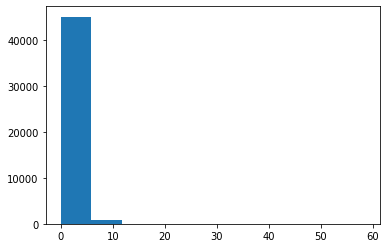

In [ ]:
# Draw a hostogram
plt.hist(cleaned_data["reviews_per_month"])

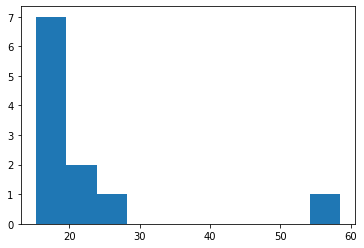

In [ ]:
# Lets find properties with more than 15 review per month
top_review=cleaned_data[cleaned_data["reviews_per_month"]>15]
plt.hist(top_review["reviews_per_month"]);

As we can see there is coupple of cases with more than 15 reviews per month. In my point of view, it would be hard to have more than 15 review each month. Unless, the review are fake.
However, I would not remove them from the dataset. Because, I would like to see investigate its effect on the price.

* **last review**

The last reviwe is a date object. It is hard to find outlier based on data object. To overcome this issue, I split year and month into seperate feture columns. 

In [ ]:
cleaned_data[["last_review_year","last_review_month", "last_review_day"]]=cleaned_data["last_review"].str.split("-",expand=True)

Lets have look ad the distribution of last_review_month and last_review_year

(array([ 5957., 11651.,  5637.,  1103., 12891.,  1648.,  1592.,  1996.,
         1463.,  1969.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

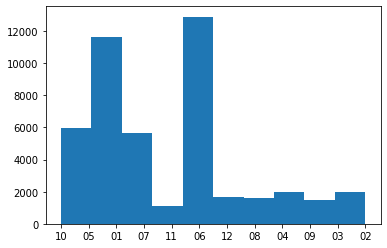

In [ ]:
# Create a histogram on last_review_month
plt.hist(cleaned_data["last_review_month"])

The distribution of the month is little bit starange. I excpected a more unifrom distribution. For the 01 month it is logical to have more cases for one main reasons. 
First, we replaced the Nan values with 2022-01-01. So we have all of missing values as 01.
However, I can not draw any conclusion that why last reviews for many properties submited on June.

(array([5.7700e+03, 2.3875e+04, 9.0080e+03, 3.0890e+03, 7.0000e+00,
        2.5790e+03, 2.3000e+01, 1.3230e+03, 4.6000e+01, 1.8700e+02]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

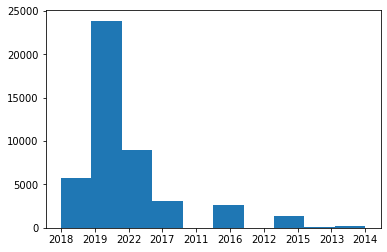

In [ ]:
# Create a histogram on last_review_year
plt.hist(cleaned_data["last_review_year"])

The above figure make sence. From this figure, we can coclude that there are some properties that stop being shared by the owner or people stoped renting them and sumitting reviews. However, the rate for this houses is increasing. In my point of view it is logical, because the company grwoth and more and more houses shared and therefore more houses exit the sharing process.

## Task 2: Analysing despceriptive statisitics with visualization
We had a galnce on the data in the previous section. In this section we deep dive to the data and try to underastand the data more.

### Finding how property specification effect the price
On of the main fetures about the shared houses is their location. Lets creat a heat map based on the location and price

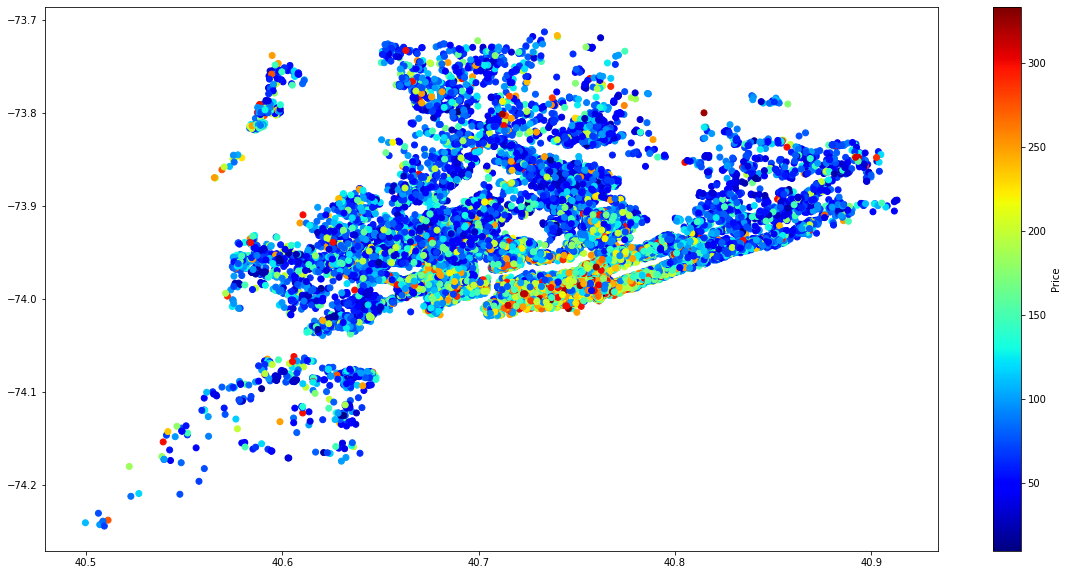

In [ ]:
plt.figure(figsize=(20,10))
subplot_1=plt.scatter(cleaned_data["latitude"], cleaned_data["longitude"], c=cleaned_data["price"],cmap=plt.get_cmap('jet'));
plt.colorbar(label="Price");

As we can see prices at Manhattan are more corrolated and properties at this area are more expensive. Other neigherhood have a equal distribution over the price. Lets look at desciptive statistics on the pirce for each neighberhood.

In [ ]:
# Get descriptive statistics for each neighbourhood and round it to 1 decimal
price_per_neighbourhood=(cleaned_data[["price", "neighbourhood_group"]].groupby(cleaned_data["neighbourhood_group"]).describe()).round(1)
price_per_neighbourhood

price                                              
                       count   mean   std   min   25%    50%    75%    max
neighbourhood_group                                                       
Bronx                 1069.0   77.4  47.1  10.0  45.0   65.0   95.0  325.0
Brooklyn             19406.0  105.7  60.9  10.0  60.0   90.0  140.0  333.0
Manhattan            19500.0  145.9  70.4  10.0  90.0  135.0  199.0  333.0
Queens                5567.0   88.9  53.5  10.0  50.0   74.0  108.0  325.0
Staten Island          365.0   89.2  57.7  13.0  50.0   75.0  105.0  300.0

In [ ]:
def gradientbars(bars):
    grad = np.atleast_2d(np.linspace(0,1,256)).T
    ax = bars[0].axes
    lim = ax.get_xlim()+ax.get_ylim()
    for bar in bars:
        bar.set_zorder(1)
        bar.set_facecolor("none")
        x,y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        ax.imshow(grad, extent=[x,x+w,y,y+h], aspect="auto", zorder=0)
    ax.axis(lim)


Text(0, 0.5, 'Property Count')

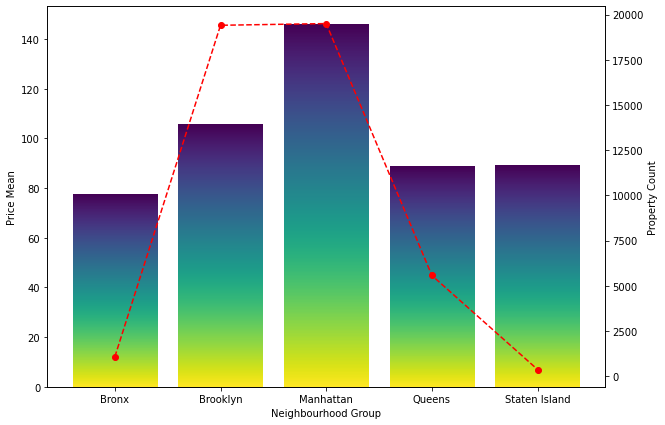

In [ ]:
# Create a plot to compare price and number of properties in each neighourhood group
fig, ax1=plt.subplots(figsize=(10,7))
ax2=ax1.twinx()
plt1=ax1.bar(price_per_neighbourhood.index, price_per_neighbourhood["price","mean"])
ax2.plot(price_per_neighbourhood.index, price_per_neighbourhood["price","count"], c="r", marker="o", linestyle="dashed")

gradientbars(plt1)
ax1.set_xlabel("Neighbourhood Group")
ax1.set_ylabel("Price Mean")
ax2.set_ylabel("Property Count")
# plt.show()

As we saw in the scatter plot, the Manhattan has the higer prices and mean for this area shows that. However, the other 4 areas are closer. Brooklyn is the second most expensive houses. The other 3 zones does not differ.
Because we droped the high prices with IQR the max prices in all areas are close. Let look at descritve stats in raw data. 

In [ ]:
# Get descriptive statistics for the main data
(raw_data[["price", "neighbourhood_group"]].groupby(raw_data["neighbourhood_group"]).describe()).round(1)

price                                                 
                       count   mean    std   min   25%    50%    75%      max
neighbourhood_group                                                          
Bronx                 1091.0   87.5  106.7   0.0  45.0   65.0   99.0   2500.0
Brooklyn             20104.0  124.4  186.9   0.0  60.0   90.0  150.0  10000.0
Manhattan            21661.0  196.9  291.4   0.0  95.0  150.0  220.0  10000.0
Queens                5666.0   99.5  167.1  10.0  50.0   75.0  110.0  10000.0
Staten Island          373.0  114.8  277.6  13.0  50.0   75.0  110.0   5000.0

As we can see we have a great difference in Staten Island before and after handling outliers. The difference between number of rows is about 8, but the difference between mean, std, and max is huge. It shows that we removed the real outlires.:)
However,  we lost a great deal of data in Manhattan. It makes sense, because we used only upper bound in our IQR method, and Manahattan is the most expensive part of the city. Therfore, we removed more records from Manhattan.It is a plusible solution to do remove outliers based on the each neighbourhood gropu, but I prerfer to countinue with current configuration.

### Investigating other features

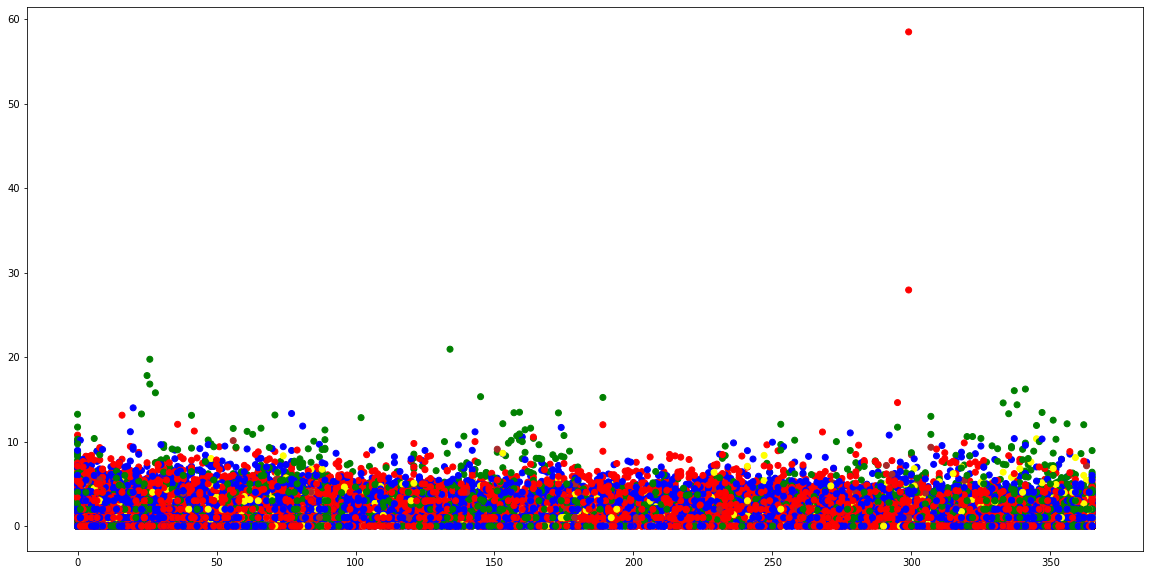

In [ ]:
#lets see if we can find any relation between availability_365 and reviews_per_month
plt.figure(figsize=(20,10))
plt.scatter(cleaned_data["availability_365"],cleaned_data["reviews_per_month"], c=cleaned_data["neighbourhood_group"].map(color_map))

From above plot we can not draw any conlustion. Let remove those points with more than 20 reviews per month and see if anything changes

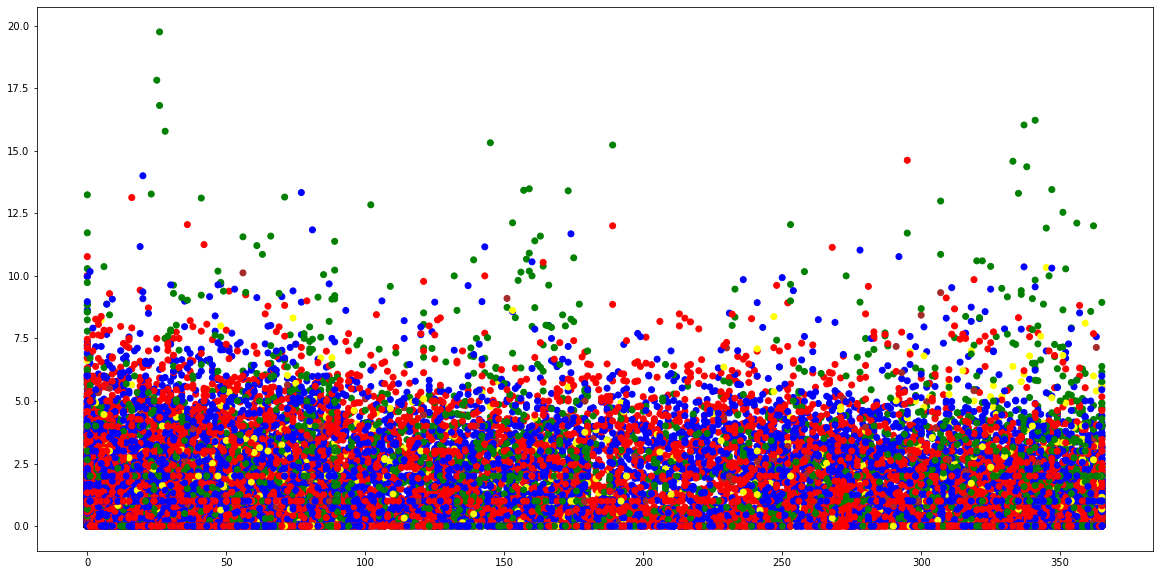

In [ ]:
# Storing all records with less than 20 reviews in avail_review dataframe and draw a scater plot
avail_review=cleaned_data[["availability_365","reviews_per_month", "neighbourhood_group"]]
avail_review=avail_review[avail_review["reviews_per_month"]<20]
plt.figure(figsize=(20,10))
plt.scatter(avail_review["availability_365"],avail_review["reviews_per_month"], c=avail_review["neighbourhood_group"].map(color_map))

Agian I can not find any realation here. 
Now let look at the distribution of availability_365.

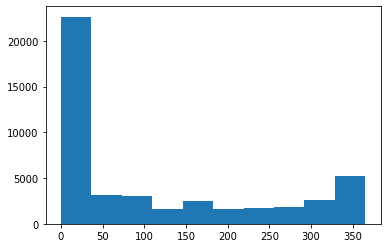

In [ ]:

plt.hist(cleaned_data["availability_365"]);

Houses with less than 36 days availability include most of the cases. Other bins have the same proability.

In [ ]:
cleaned_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month,last_review_day
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018,10,19
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019,05,21
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2022-01-01,0.00,1,365,2022,01,01
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2019,07,05
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2018,11,19


## Task 3: Analysing owners
In this task we try to find which owner has the most shares housed and see if we can find any kind of pattern.

In [ ]:
# First lets find how many houses has been shared by each host
cleaned_data["host_id"].value_counts()

219517861    272
107434423    176
137358866    103
30283594      95
12243051      95
            ... 
69254072       1
20354912       1
10777637       1
69236458       1
68119814       1
Name: host_id, Length: 35386, dtype: int64

There is 35386 unique hosts. Lets take a look on top 10 hosts.

In [ ]:
# Preparing a dataframe with top 10 host
top_10_host=pd.DataFrame(cleaned_data["host_id"].value_counts().head(10))
top_10_host.reset_index(inplace=True)
top_10_host.rename(columns={"index":"host_id", "host_id":"property_count"}, inplace=True)
# storing all features for top 10 host in top_10_host_data df.
top_10_host_data=cleaned_data[cleaned_data["host_id"].isin(top_10_host["host_id"])]
# Converting host_id from integer to string(when we draw plot based on host_id the seaborn round the host_id automatically)
top_10_host_data["host_id"]=top_10_host_data["host_id"].apply(str)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


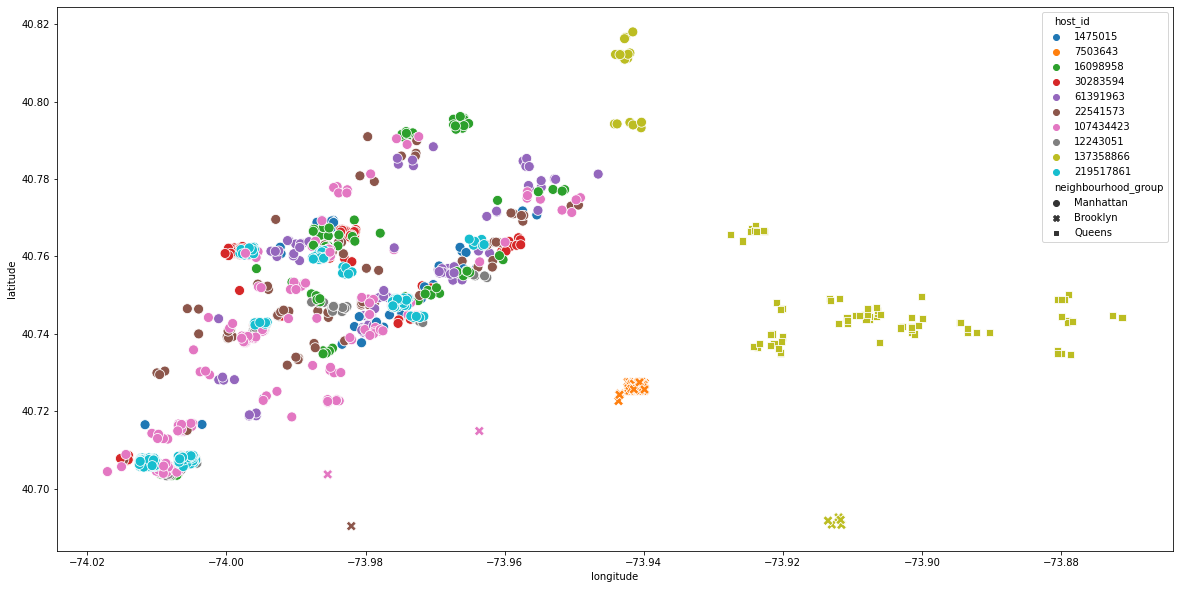

In [ ]:
# Create a scater plot based on host_id and neighbourhood_group.
sns.scatterplot(data=top_10_host_data ,x='longitude', y='latitude', hue='host_id', style="neighbourhood_group", s=100)
plt.gcf().set_size_inches(20, 10)

Accroding to the above plot, we can conclude that the host number 137358866 works on the east part of the city. Moreover, he is the domainant host in Queens neighourhood. Host number 7503643 works only on Brroklyn and he is dominant in this zone. Other top hosts target Manhattan.
In my point of view, tha Airbnb co, should be very carefull with these two hosts and target them with special marketing plan. Because if any kind of dissatisfaction happens, they may churn, and use competitors. 

In [ ]:
#Let look at the review_per_month statistics per host
(top_10_host_data[["reviews_per_month", "host_id"]].groupby(top_10_host_data["host_id"]).describe()).round(3)

reviews_per_month                                              
                      count   mean    std  min    25%    50%    75%   max
host_id                                                                  
107434423             176.0  0.030  0.080  0.0  0.000  0.000  0.000  0.39
12243051               95.0  0.091  0.181  0.0  0.000  0.000  0.090  0.79
137358866             103.0  0.220  0.283  0.0  0.000  0.000  0.380  1.00
1475015                52.0  0.071  0.061  0.0  0.030  0.050  0.110  0.23
16098958               90.0  0.079  0.119  0.0  0.000  0.045  0.108  0.77
219517861             272.0  1.089  1.140  0.0  0.000  0.865  1.935  4.52
22541573               87.0  0.049  0.102  0.0  0.000  0.000  0.060  0.73
30283594               95.0  0.034  0.107  0.0  0.000  0.000  0.050  1.00
61391963               91.0  0.233  0.181  0.0  0.125  0.220  0.300  1.00
7503643                52.0  0.095  0.056  0.0  0.060  0.085  0.120  0.28

As we can see host number 219517861 who hast the biggest portfolios of properties, also has the biggest reviews per month mean. To be honest, for non of these hosts, the managment of the properties can not be done by only one person. Therefore, I think there is small companies whihc manage their properties on Airnbn wesite. However, for host number 219517861 things are a little bit different. In my point of view, they have a big team, with great marketing team. They may follow their guest and convince them to submit reviews, or if we became pesimitics, they may submit reviews by their own staff so they make their prooerties in top hot list. 

## Task 4: Finding host with most costumers and reasons for that

In [ ]:
comment_pt=pd.pivot_table(cleaned_data, values=["reviews_per_month", "price"], index=["host_id"], aggfunc=np.sum)
host_pt=pd.DataFrame(cleaned_data["host_id"].value_counts())

In [ ]:
merged_host_id=host_pt.merge(comment_pt, left_index=True, right_index=True)
merged_host_id.reset_index(inplace=True)
merged_host_id.rename(columns={"index":"host_id", "host_id":"proprty_count"}, inplace=True)
merged_host_id["avg_price"]=(merged_host_id["price"]/merged_host_id["proprty_count"]).round(1)
merged_host_id.head()

,host_id,proprty_count,price,reviews_per_month,avg_price
0,219517861,272,56166,296.11,206.5
1,107434423,176,49149,5.35,279.3
2,137358866,103,4514,22.68,43.8
3,30283594,95,20885,3.26,219.8
4,12243051,95,20074,8.65,211.3


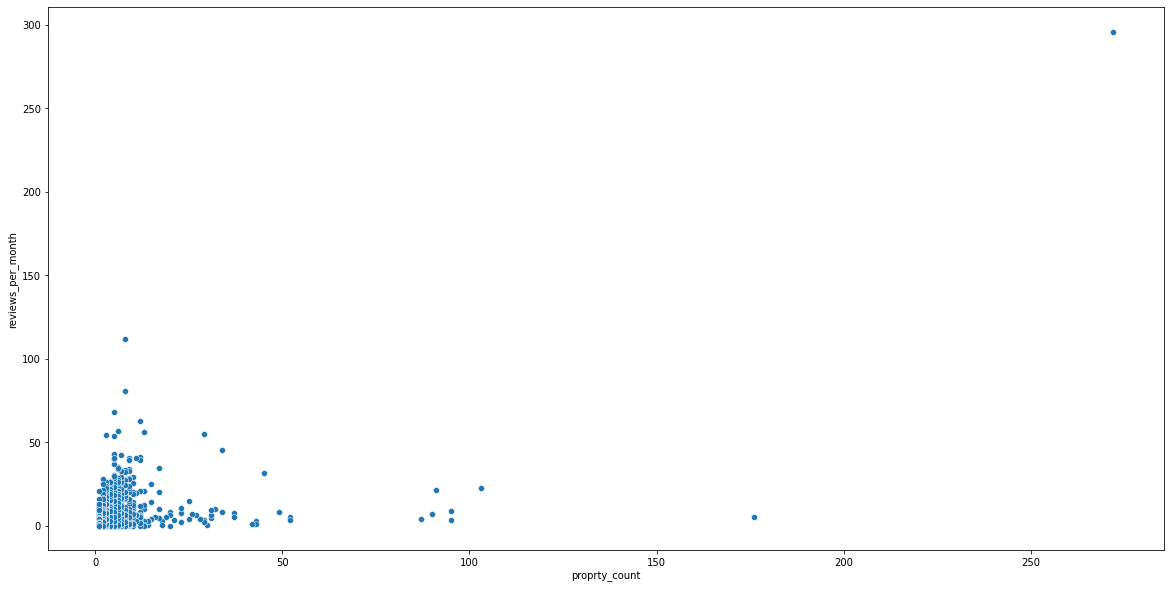

In [ ]:
sns.scatterplot(data=merged_host_id ,x='proprty_count', y='reviews_per_month')
plt.gcf().set_size_inches(20, 10)

In [ ]:
cleaned_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month,last_review_day
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018,10,19
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019,05,21
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2022-01-01,0.00,1,365,2022,01,01
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2019,07,05
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2018,11,19


## Taks 5: Defining 5 statistical hypothesises and investigating them.
Hypthesis 1: The price distribution is normal?
Hypthesis 2: Does price is equal in each neighbourhood group

### **H1**: Normal Distribution

In [ ]:
# Importing scipy stat libarary for needed statistics
import scipy.stats as stats

In [ ]:
# Let see if price has a normal distribution
stats.normaltest(cleaned_data["price"])


NormaltestResult(statistic=4861.987443097182, pvalue=0.0)

As we can see the p_value is zero and therfore, we can reject the null hypothisis. The price does not fit a normal distribution. Let draw the normal probabilty plot to check the price again.

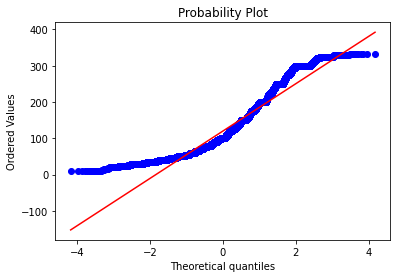

In [ ]:
stats.probplot(cleaned_data['price'], plot=plt);

Above plot also showes that the price data does not follow a straigh line. Therfore, price has not normal distribution.
Lets check the normal distribution in each neighbourhood.

In [ ]:
unique_neighbourhood = cleaned_data['neighbourhood_group'].unique()
i=0
nor_dist_pvalue=pd.DataFrame(columns=["neighbourhood_groop","statistic", "p_value"])
for neighbourhood in unique_neighbourhood:
  statistic, p_value=stats.normaltest(cleaned_data[cleaned_data["neighbourhood_group"]==neighbourhood]["price"])
  nor_dist_pvalue.loc[i]=(neighbourhood,statistic.round(2),p_value.round(4))
  i+=1
nor_dist_pvalue

,neighbourhood_groop,statistic,p_value
0,Brooklyn,3293.48,0.0
1,Manhattan,1273.62,0.0
2,Queens,1689.98,0.0
3,Staten Island,125.64,0.0
4,Bronx,481.67,0.0


Again the p_value for normal distribution for each neighbourhoud group is zero and we can reject all null hypothsis and conclude that the price in eahc neighberhood_group has not normal distribution.
Lets take a look at probality plot for each neighbourhood group.

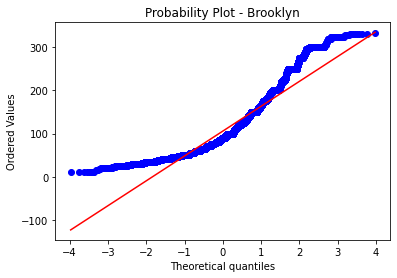

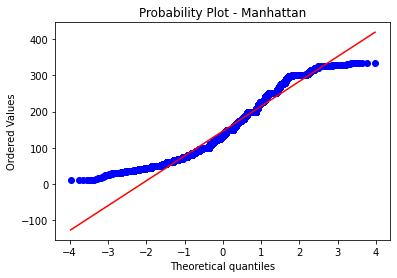

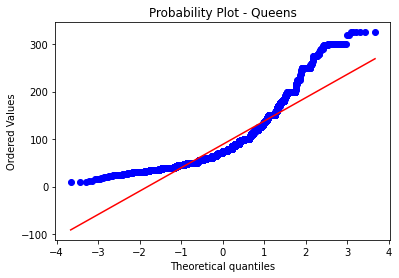

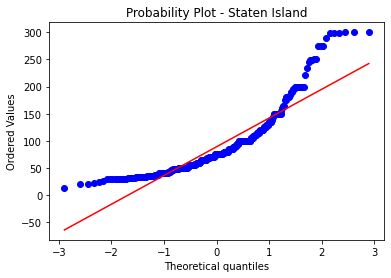

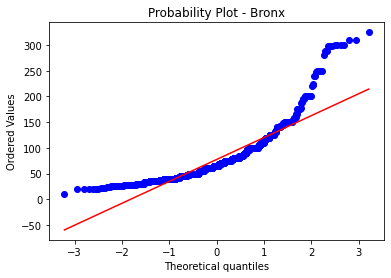

In [ ]:
for neighbourhood in unique_neighbourhood:
    stats.probplot(cleaned_data[cleaned_data['neighbourhood_group'] == neighbourhood]['price'], dist="norm", plot=plt )
    plt.title("Probability Plot - " +  neighbourhood)
    plt.show()

The probabilty plot is also showes that we can not fit normal distributuion on each neighberhood_group.

### **H2**: One-Way Anova on price and neighbourhood group

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


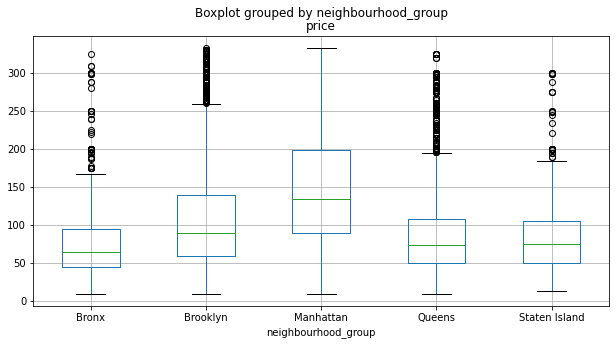

In [ ]:
# First lets create a box plot
cleaned_data.boxplot("price", by="neighbourhood_group", figsize=(10,5));

Judging by the Boxplot there are differences in the price for the Brooklyn, Manhattan, and other zones. Let see that the ANOVA test proves it or not.

In [ ]:
#Stor neighberhood price in new data frame
neighbourhood_price=pd.DataFrame({neighbourhood:cleaned_data["price"][cleaned_data["neighbourhood_group"]==neighbourhood] for neighbourhood in unique_neighbourhood})
#Drop NaN valued
data=[neighbourhood_price[col].dropna() for col in neighbourhood_price]


In [ ]:
# Calculating P-Value for anova
stats.f_oneway(*data)

F_onewayResult(statistic=1506.07670402143, pvalue=0.0)

The P-Value is zero which means that the price mean between neighbourhood group is not equall and we can reject the H0

### **H3**: Does price in Bronx and Staten Island equall.

Frist let's check if the variance in two populations is equll or not?
Becuase we conclude that the price in neighbourhood groups does not have normal distribuation, therfore we better use Leven test for equality of vairances.
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html

In [ ]:
stats.levene(cleaned_data["price"][cleaned_data["neighbourhood_group"]=="Bronx"],
                   cleaned_data["price"][cleaned_data["neighbourhood_group"]=="Staten Island"])

LeveneResult(statistic=10.8702277774617, pvalue=0.0010011708090621695)

The small p-value suggests that the populations do not have equal variances.
Now, let's perform T-test for the means of two independent samples of scores with unequal varince


In [ ]:
stats.ttest_ind(cleaned_data["price"][cleaned_data["neighbourhood_group"]=="Bronx"],
                cleaned_data["price"][cleaned_data["neighbourhood_group"]=="Staten Island"],
                equal_var=False)

Ttest_indResult(statistic=-3.5261764309472103, pvalue=0.00045753711043566527)

The small p-value again suggests that the populations do not have equal mean.

### H4:Price in Private room >Price in Shared room

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


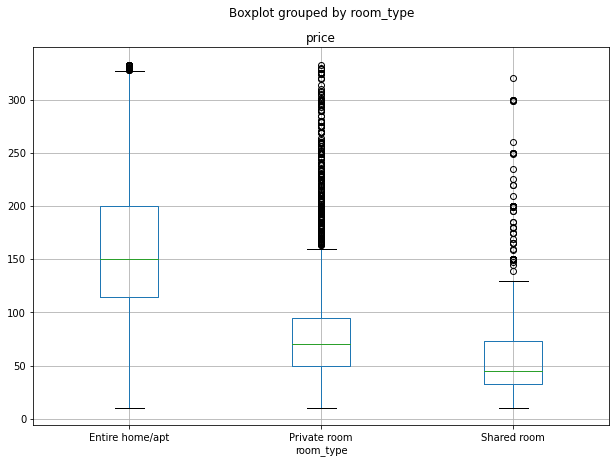

In [ ]:
# First let's create a box plot and see if we can detecet any differences
cleaned_data.boxplot("price", by="room_type",figsize=(10,7));

The box plot showes that there is slight diffrences in price between Private room and Shared room. But we have to be sure that this diference is meaningfull.
However,  the t test in scipy library is two tailed. To overcome this constraint, we calculate the t value it t test and then compare it by the expected t value to accept the null hypothesis.

In [ ]:
# Calculating t value in independent t test.
t_value=stats.ttest_ind(cleaned_data["price"][cleaned_data["room_type"]=="Shared room"],
                cleaned_data["price"][cleaned_data["room_type"]=="Private room"]).statistic

In [ ]:
# Calculating degree of freedom
degree_of_freedom=cleaned_data["room_type"].value_counts()["Shared room"]+cleaned_data["room_type"].value_counts()["Private room"]-2
# Defining alpha
alpha=0.05
# Calculating t value based on degree of freedom and alpah
t_crit=stats.t.ppf(q=1-alpha, df=degree_of_freedom)
(t_crit, t_value)

(1.6449195280269775, -15.656058001740146)

The t_crict is more than t_value, therefore, we can accept the null hypothesis.

### H5: Does the number of last review for each month has the exponential distribution

In [ ]:
# Getting reviews based on year and month
last_review=cleaned_data["last_review_year"]+"-"+cleaned_data["last_review_month"]

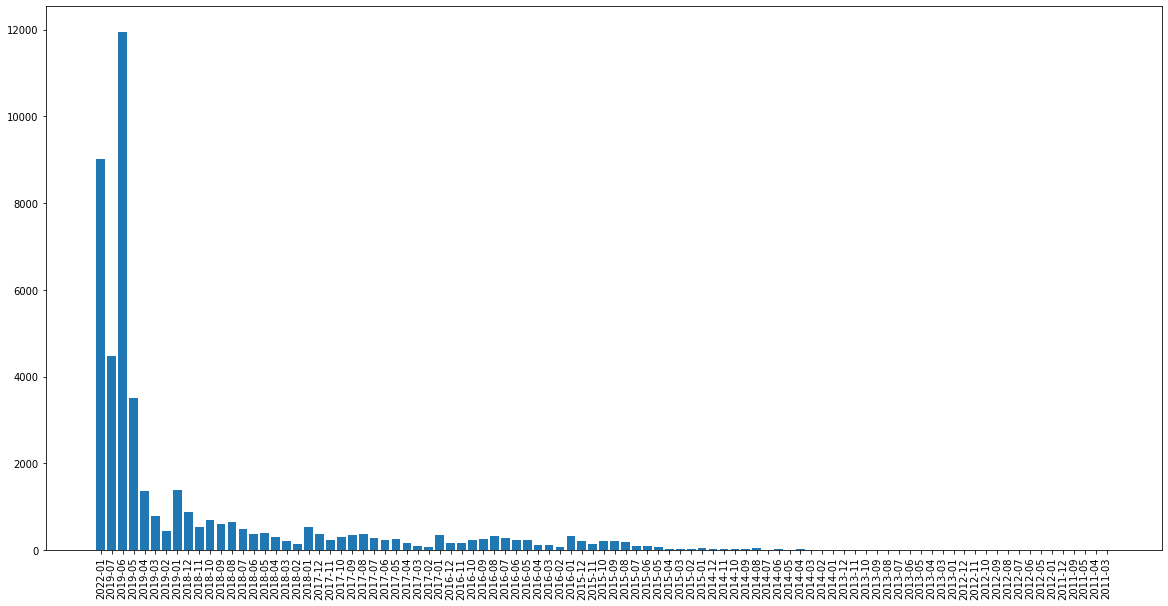

In [ ]:
# Creating a data frame based on last review month and year count
last_review_count=pd.DataFrame(last_review.value_counts())
last_review_count.reset_index(inplace=True)
last_review_count.rename(columns={"index":"year_month", 0:"count"},inplace=True)
last_review_count.sort_values("year_month",ascending=False, axis=0,inplace=True)
# Drawing a bar plot for number of last review for each month
plt.figure(figsize=(20,10))
plt.bar(last_review_count["year_month"],last_review_count["count"] );
plt.xticks(rotation=90);

According to the above plot we can see that the number of last review for each month growth exponetially. However, for last two month it drops. For, 2022-01 we impute the missing data manually so we should drop these records. For 2019-07, it happens because the time for the data quary was perhaps in the middle of 2019-01, so this month does not have all data. Therfore, we will drop these records too.

In [ ]:
# Removing 2022-01 and 2019-07 records
last_review_count = last_review_count[last_review_count["year_month"] != "2022-01"]
last_review_count = last_review_count[last_review_count["year_month"] != "2019-07"]

In [ ]:
 # Calculating paramater of the exponential distribution
 param = stats.expon.fit(last_review_count["count"])

In [ ]:
# Performing Kolmogorov-Smirnov test for goodness of fit.
stats.kstest(last_review_count["count"], lambda x: stats.expon.cdf(x,*param))

KstestResult(statistic=0.3496493313021043, pvalue=1.8919859471039295e-10)

The P-Value for this test is near to zero. Therfore, we can reject the null hypothesis, and the underlying distribution is not exponential.

## Task 5: Prediciting the rental price by provided feature vectors

In [ ]:
# First lets drop columns that are not needed.

In [ ]:
# Dropping columns and rows
reg_data=pd.DataFrame()
reg_data=cleaned_data.drop(columns=["id", "name", "host_id", "last_review_day","host_name"],axis=0)
reg_data = reg_data[reg_data["last_review"] != "2022-01-01"]
reg_data.reset_index(inplace=True)
reg_data.drop(columns=["last_review", "index"], axis=1, inplace=True)
len(reg_data)

36899

In [ ]:
# Transforming Categorical features
# Creating a categorical fearue list
categorical_feature=("neighbourhood_group", "neighbourhood" ,"room_type")
# Transformin each categorical feature using get_dummies method and dropping main feature
for ct_ft in categorical_feature:
  reg_data =pd.concat([reg_data, pd.get_dummies(reg_data[ct_ft], prefix=ct_ft)], axis=1)
  reg_data.drop(ct_ft, axis=1, inplace=True)

latitude                     0
longitude                    0
price                        0
minimum_nights               0
number_of_reviews            0
                            ..
neighbourhood_Woodlawn       0
neighbourhood_Woodside       0
room_type_Entire home/apt    0
room_type_Private room       0
room_type_Shared room        0
Length: 236, dtype: int64

In [ ]:
# Importing Spliting library
from sklearn.model_selection import train_test_split

In [ ]:
#Defining X and y
X=reg_data.drop("price", axis=1)
y=reg_data["price"]

In [ ]:
#Spliting Data
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)


In [ ]:
# Nromalize numerical features in X
numerical_features=("latitude", "longitude", "minimum_nights","number_of_reviews","reviews_per_month",
                 "calculated_host_listings_count","availability_365" )
X_train_norm=pd.DataFrame()
X_test_norm=pd.DataFrame()
for nf in numerical_features:
  col_name=nf+"_norm"
  mean=X_train[nf].mean()
  std=X_train[nf].std()
  X_train_norm[col_name]=(X_train[nf]-mean)/std
  X_test_norm[col_name]=(X_test[nf]-mean)/std

In [ ]:
# Nromalize y
mean=y_train.mean()
std=y_train.std()
y_train_norm=(y_train-mean)/std
y_test_norm=(y_test-mean)/std

In [ ]:
from sklearn import linear_model
from sklearn.metrics import r2_score

In [ ]:
reg_model_1= linear_model.LinearRegression()
reg_model_1.fit(X_train_norm, y_train_norm)
y_pred_norm_rgm_1=reg_model_1.predict(X_test_norm)
r2_score(y_test_norm, y_pred_norm_rgm_1)

0.10492605421924328

In [ ]:
reg_model_2= linear_model.LinearRegression()
reg_model_2.fit(X_train, y_train)
y_pred_rgm_2=reg_model_2.predict(X_test)
r2_score(y_pred_rgm_2, y_test)

-0.0005383320350802467

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
reg_model_3=RandomForestRegressor()
reg_model_3.fit(X_train_norm, y_train_norm)
y_pred_rgm_3=reg_model_3.predict(X_test_norm)
r2_score(y_test_norm, y_pred_rgm_3)

0.3146539291721604

In [ ]:
reg_model_4=RandomForestRegressor(max_depth=10, random_state=1)
reg_model_4.fit(X_train, y_train)
y_pred_rgm_4=reg_model_4.predict(X_test)
r2_score(y_test, y_pred_rgm_4)

0.5748890387908117